In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define target function

def f(x):
    return np.exp(-np.sin(x**2)/2) + x

# Step 2: Generate dataset

x_values = np.linspace(-10, 10, 25)
y_values = f(x_values)

# Shuffle and split into train/test
np.random.seed(42)
indices = np.random.permutation(len(x_values))
train_idx, test_idx = indices[:20], indices[20:]

X_train, y_train = x_values[train_idx], y_values[train_idx]
X_test, y_test   = x_values[test_idx], y_values[test_idx]


In [48]:

# Step 3: Activation and derivative

def g(z):
    return np.tanh(z)

def g_prime(z):
    return 1 - np.tanh(z)**2



In [49]:

# Step 4: Initialize parameters

np.random.seed(1)
w1, b1 = np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5)
w2, b2 = np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5)
w3, b3 = np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5)

In [50]:
# Step 5 Forward propagation

def forward(x, w1, b1, w2, b2, w3, b3):
    z1 = w1*x + b1
    a1 = g(z1)

    z2 = w2*a1 + b2
    a2 = g(z2)

    z3 = w3*a2 + b3
    y_hat = g(z3)

    cache = (x, z1, a1, z2, a2, z3, y_hat)
    return y_hat, cache


In [51]:

# Step 6 Backward propagation
def backward(y, cache, w1, w2, w3):
    x, z1, a1, z2, a2, z3, y_hat = cache

    # dL/dy_hat
    dJ_dyhat = 2*(y_hat - y)

    # Layer 3
    dJ_dz3 = dJ_dyhat * g_prime(z3)
    dJ_dw3 = dJ_dz3 * a2
    dJ_db3 = dJ_dz3

    # Layer 2
    dJ_da2 = dJ_dz3 * w3
    dJ_dz2 = dJ_da2 * g_prime(z2)
    dJ_dw2 = dJ_dz2 * a1
    dJ_db2 = dJ_dz2

    # Layer 1
    dJ_da1 = dJ_dz2 * w2
    dJ_dz1 = dJ_da1 * g_prime(z1)
    dJ_dw1 = dJ_dz1 * x
    dJ_db1 = dJ_dz1

    return dJ_dw1, dJ_db1, dJ_dw2, dJ_db2, dJ_dw3, dJ_db3


In [52]:

# Step 7: Training loop
eta = 0.01   # learning rate
epochs = 10000

for epoch in range(epochs):
    # Gradient accumulators
    dW1 = dB1 = dW2 = dB2 = dW3 = dB3 = 0

    for x, y in zip(X_train, y_train):
        y_hat, cache = forward(x, w1, b1, w2, b2, w3, b3)
        grads = backward(y, cache, w1, w2, w3)

        dW1 += grads[0]; dB1 += grads[1]
        dW2 += grads[2]; dB2 += grads[3]
        dW3 += grads[4]; dB3 += grads[5]

    # Average gradients
    m = len(X_train)
    dW1 /= m; dB1 /= m
    dW2 /= m; dB2 /= m
    dW3 /= m; dB3 /= m

    # Update parameters
    w1 -= eta * dW1
    b1 -= eta * dB1
    w2 -= eta * dW2
    b2 -= eta * dB2
    w3 -= eta * dW3
    b3 -= eta * dB3

    # Print loss occasionally
    if epoch % 2000 == 0:
        preds = [forward(x, w1, b1, w2, b2, w3, b3)[0] for x in X_train]
        loss = np.mean((np.array(preds) - y_train)**2)
        print(f"Epoch {epoch}, Training Loss: {loss:.4f}")


Epoch 0, Training Loss: 43.7490
Epoch 2000, Training Loss: 32.5053
Epoch 4000, Training Loss: 32.4989
Epoch 6000, Training Loss: 32.4968
Epoch 8000, Training Loss: 32.4958


In [53]:

# Step 8: Evaluation
y_train_pred = [forward(x, w1, b1, w2, b2, w3, b3)[0] for x in X_train]
y_test_pred  = [forward(x, w1, b1, w2, b2, w3, b3)[0] for x in X_test]

train_mse = np.mean((np.array(y_train_pred) - y_train)**2)
test_mse  = np.mean((np.array(y_test_pred) - y_test)**2)

print("\nFinal Training MSE:", train_mse)
print("Final Test MSE:", test_mse)



Final Training MSE: 32.49512825599699
Final Test MSE: 8.935015690016863


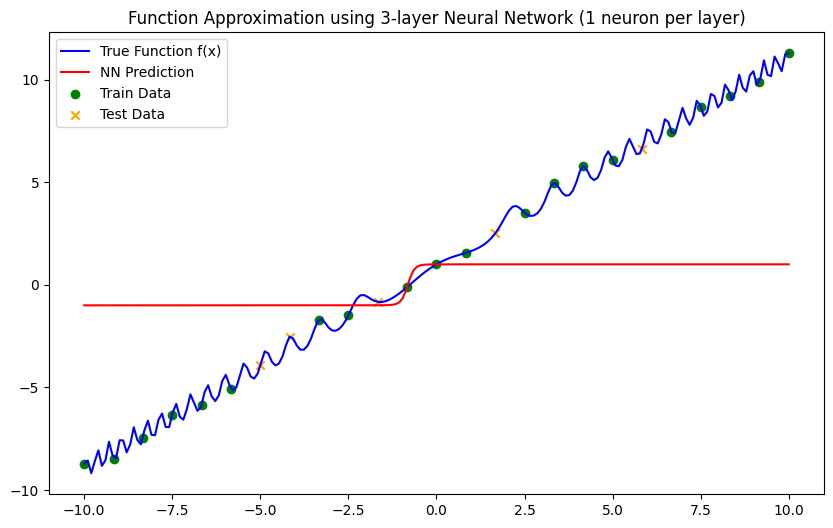

In [54]:
# Step 9: Plot results
x_plot = np.linspace(-10, 10, 200)
y_plot = f(x_plot)
y_pred_plot = [forward(x, w1, b1, w2, b2, w3, b3)[0] for x in x_plot]

plt.figure(figsize=(10,6))
plt.plot(x_plot, y_plot, label="True Function f(x)", color="blue")
plt.plot(x_plot, y_pred_plot, label="NN Prediction", color="red")
plt.scatter(X_train, y_train, label="Train Data", color="green", marker="o")
plt.scatter(X_test, y_test, label="Test Data", color="orange", marker="x")
plt.legend()
plt.title("Function Approximation using 3-layer Neural Network (1 neuron per layer)")
plt.show()
